Import all libraries and functions

In [3]:
from functions import *

Import the dataframe

In [4]:
df_reviews = pd.read_csv('../../data/cleaned/reviews.csv', encoding='utf-8', parse_dates=['creation_timestamp','answer_timestamp'] )
df_reviews = df_reviews.copy()

In [5]:
df_reviews.dtypes

review_id                     object
order_id                      object
score                          int64
title                         object
message                       object
creation_timestamp    datetime64[ns]
answer_timestamp      datetime64[ns]
review_unique_id              object
dtype: object

## Setup Portuguese words 

In [6]:
# Download Portuguese stopwords (ex: "o", "a", "os", "as", "de", "que", "em".)

setup_nltk()
portuguese_stopwords = get_portuguese_stopwords()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Gebruiker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [7]:
df_reviews['cleaned_review'], df_reviews['emojis'] = zip(*df_reviews['message'].apply(lambda x: clean_text(x, portuguese_stopwords)))

## Sentiment Analysis

#### Emoji Analysis

In [8]:
emoji_counts = df_reviews['emojis'].apply(lambda x: [c for c in x]).explode().value_counts()

c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128079 (\N{CLAPPING HANDS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Gebruiker\anaconda3\envs\env_project_final\Lib\site-packages\IPython\core\pylabtools.py:170

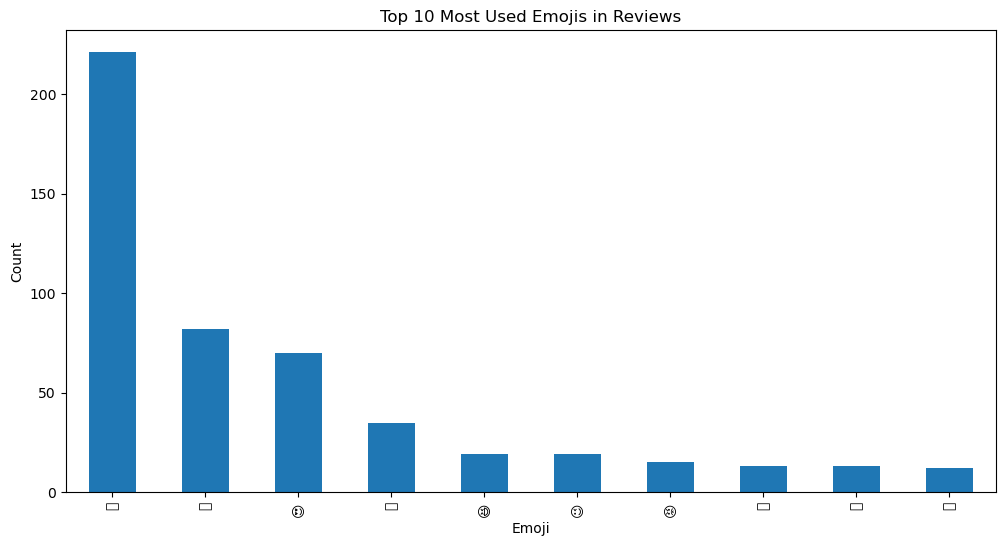

In [9]:
# Visualize emoji distribution

plt.figure(figsize=(12, 6))
emoji_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Used Emojis in Reviews')
plt.xlabel('Emoji')
plt.ylabel('Count')
plt.show()

### Word frequency analysis

In [10]:
# Get most common words
all_words = ' '.join(df_reviews['cleaned_review']).split()
valid_words = [word for word in all_words if is_valid_word(word)]
word_counts = Counter(valid_words)
top_words_pt = word_counts.most_common(20)


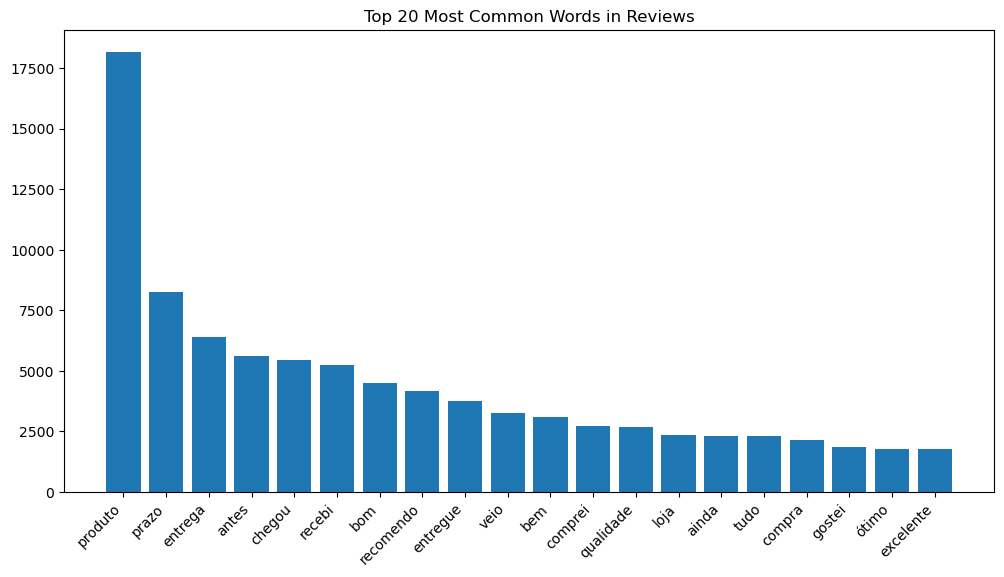

In [11]:
# Visualize
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_words_pt))
plt.title('Top 20 Most Common Words in Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

Get the top words in English

In [12]:
top_words_pt = word_counts.most_common(20)
top_words_en = [(translate_to_english(word), count) for word, count in top_words_pt]

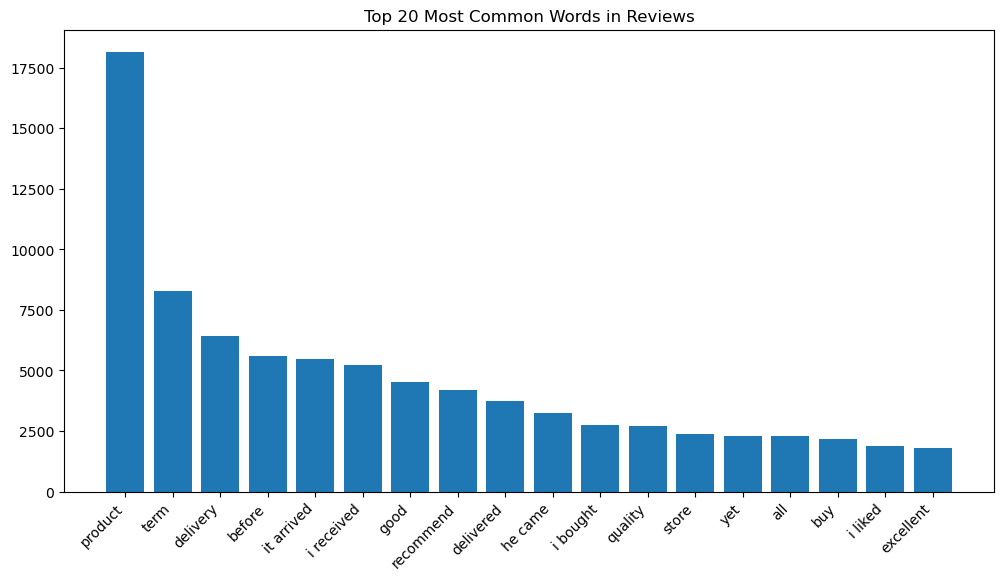

In [13]:
# Visualize
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_words_en))
plt.title('Top 20 Most Common Words in Reviews')
plt.xticks(rotation=45, ha='right')
plt.show()

In [14]:
tqdm.pandas()

df_reviews['sentiment_score'] = df_reviews['cleaned_review'].apply(get_sentiment) 
df_reviews['sentiment'] = df_reviews['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')) # forced to stop after 110 minutes


KeyboardInterrupt: 

In [24]:
df_reviews.head()

,review_id,order_id,score,title,message,creation_timestamp,answer_timestamp,review_unique_id,cleaned_review,emojis
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,0,0,2018-01-18,2018-01-18 21:46:59,7bc2406110b926393aa56f80a40eba40_73fc7af87114b...,0,
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,0,0,2018-03-10,2018-03-11 03:05:13,80e641a11e56f04c1ad469d5645fdfde_a548910a1c614...,0,
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0,2018-02-17,2018-02-18 14:36:24,228ce5500dc1d8e020d8d1322874b6f0_f9e4b658b201a...,0,
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,0,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,e64fb393e7b32834bb789ff8bb30750e_658677c97b385...,recebi bem antes prazo estipulado,
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,0,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,f7c4243c7fe1938f181bec41a392bdeb_8e6bfb81e283f...,parabéns lojas lannister adorei comprar intern...,


In [25]:
data_exploration(df_reviews)

Number of rows: 99224
Number of columns: 10
Number of duplicates: 0

Numerical Columns: Index(['score'], dtype='object')

Categorical Columns: Index(['review_id', 'order_id', 'title', 'message', 'review_unique_id',
       'cleaned_review', 'emojis'],
      dtype='object')


,Column,Data Type,Non-Null Count,Missing Values,Unique Values
0,review_id,object,99224,0,98410
1,order_id,object,99224,0,98673
2,score,int64,99224,0,5
3,title,object,99224,0,4527
4,message,object,99224,0,36159
5,creation_timestamp,datetime64[ns],99224,0,636
6,answer_timestamp,datetime64[ns],99224,0,98248
7,review_unique_id,object,99224,0,99224
8,cleaned_review,object,99224,0,32686
9,emojis,object,99224,0,124


In [ ]:
# # Visualize sentiment distribution
# df_reviews['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
# plt.title('Sentiment Distribution')
# plt.show()

In [15]:
# Load environment variables from a .env file
load_dotenv()

# Retrieve the API key from the environment variables
api_key = os.getenv("hugging_face_password")

print(f"API Key (first 5 characters): {api_key[:5]}...")  # Print first 5 chars for verification


API Key (first 5 characters): hf_NX...


In [26]:
import requests

API_URL = "https://api-inference.huggingface.co/models/avichr/heBERT_sentiment_analysis"
headers = {"Authorization": "Bearer" + " " + api_key}

def query(payload):
	response = requests.post(API_URL, headers=headers, json=payload)
	return response.json()
	
output = query({
	"inputs": "I like you. I love you",
})

In [27]:
def query(payload):
    try:
        response = requests.post(API_URL, headers=headers, json=payload)
        response.raise_for_status()  # Raise an error for bad status codes
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Request failed: {e}")
        return None
    except ValueError as e:
        print(f"Error decoding JSON: {e}")
        return None

In [28]:
sentiment_results = []
for review in df_reviews['cleaned_review']:
    # Translate the review to English
    translated_review = translate_to_english(review)
    
    # Send the translated review for sentiment analysis
    result = query({"inputs": translated_review})
    if result is not None:
        sentiment_results.append(result)
    else:
        sentiment_results.append({"error": "Failed to get sentiment"})


KeyboardInterrupt: 

In [20]:
sentiment_results = []
for review in df_reviews['cleaned_review']:
    result = query({"inputs": review})
    if result is not None:
        sentiment_results.append(result)
    else:
        sentiment_results.append({"error": "Failed to get sentiment"})

Request failed: 400 Client Error: Bad Request for url: https://api-inference.huggingface.co/models/avichr/heBERT_sentiment_analysis
Request failed: 400 Client Error: Bad Request for url: https://api-inference.huggingface.co/models/avichr/heBERT_sentiment_analysis
Request failed: 400 Client Error: Bad Request for url: https://api-inference.huggingface.co/models/avichr/heBERT_sentiment_analysis
Request failed: 400 Client Error: Bad Request for url: https://api-inference.huggingface.co/models/avichr/heBERT_sentiment_analysis
Request failed: 400 Client Error: Bad Request for url: https://api-inference.huggingface.co/models/avichr/heBERT_sentiment_analysis
Request failed: 400 Client Error: Bad Request for url: https://api-inference.huggingface.co/models/avichr/heBERT_sentiment_analysis
Request failed: 400 Client Error: Bad Request for url: https://api-inference.huggingface.co/models/avichr/heBERT_sentiment_analysis
Request failed: 400 Client Error: Bad Request for url: https://api-inference

KeyboardInterrupt: 

In [ ]:
# df_reviews['sentiment_results'] = sentiment_results

Save to a new csv file

In [ ]:
df_reviews.to_csv('../../data/cleaned/sentiment_analysis.csv')

In [ ]:
from transformers import pipeline

# Load emotion classification model
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)

# Function to get emotions
def get_emotions(text):
    results = emotion_classifier(text)
    return {r['label']: r['score'] for r in results[0]}

# Apply to a sample of reviews (emotion detection can be computationally intensive)
sample_df = df.sample(1000)
sample_df['emotions'] = sample_df['cleaned_review'].apply(get_emotions)

# Analyze results (example: get most common emotion)
sample_df['top_emotion'] = sample_df['emotions'].apply(lambda x: max(x, key=x.get))
sample_df['top_emotion'].value_counts().plot(kind='bar')
plt.title('Distribution of Top Emotions')
plt.show()

## Emotion Detection

In [ ]:

# Emotion Detection with Hugging Face
from transformers import pipeline

# Load multilingual emotion classification model
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", top_k=None)

# Function to get emotions
def get_emotions(text):
    results = emotion_classifier(text)
    return {r['label']: r['score'] for r in results[0]}

# Apply to a sample of reviews
sample_df = df.sample(1000)
sample_df['emotions'] = sample_df['cleaned_review'].apply(get_emotions)

# Analyze results
sample_df['top_emotion'] = sample_df['emotions'].apply(lambda x: max(x, key=x.get))
sample_df['top_emotion'].value_counts().plot(kind='bar')
plt.title('Distribution of Top Emotions')
plt.show()

In [22]:
# Initialize the translator
translator = Translator()

def get_sentiment(text):
    try:
        # Translate to English
        translated = translator.translate(text, src='pt', dest='en')
        # Perform sentiment analysis
        sentiment = TextBlob(translated.text).sentiment.polarity
        return sentiment
    except Exception as e:
        print(f"Error in translation or sentiment analysis: {e}")
        return 0  # neutral sentiment in case of error


In [23]:
# Assuming df is your DataFrame with a 'cleaned_review' column
df_reviews['sentiment_score'] = df_reviews['cleaned_review'].apply(get_sentiment) 
df_reviews['sentiment'] = df_reviews['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral')) 


Error in translation or sentiment analysis: 'NoneType' object is not iterable
Error in translation or sentiment analysis: 'NoneType' object is not iterable
Error in translation or sentiment analysis: 'NoneType' object is not iterable


KeyboardInterrupt: 